<a href="https://colab.research.google.com/github/GuyAvni1/Final-Project-Guy-Ori/blob/main/Code/Prediction_24m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Reading the data set from the drive
raw = pd.read_csv("/content/drive/MyDrive/Final_Project_Data/future_of_24m.csv")
# print(raw)
data = raw
# Define a mapping of labels to numerical values to creater baseline lable feature for training
label_mapping = {'CN': 0,'MCI': 1,  'Dementia': 2}

# Apply label encoding to the 'DX' column
data['DX'] = data['DX'].map(label_mapping)
data #Showing an example of the first 5 rows.


,RID,VISCODE,DX,FDG,AV45,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,MOCA,RAVLT_learning,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,Transition
0,4,12,1,1.249843,0.988851,1176.000000,159.700000,13.300000,1.0,15.00,22.000000,26.0,37.0,1.0,12.5000,0.0,22.047959,4.0,38527.000000,6451.000000,1.117390e+06,3519.000000,18691.000000,19758.000000,1.656740e+06,MCItoMCI
1,5,0,0,1.259560,1.350386,547.300000,337.000000,33.430000,0.0,8.67,14.670000,29.0,37.0,4.0,44.4444,0.0,22.879384,4.0,34062.000000,7075.000000,1.116630e+06,4433.000000,24788.000000,21614.000000,1.640770e+06,CNtoCN
2,5,12,0,1.280900,1.354343,472.800000,334.100000,34.040000,1.5,5.67,9.393589,30.0,40.0,6.0,50.0000,0.0,25.098837,6.0,35333.000000,6832.000000,1.102410e+06,3609.000000,24193.000000,20474.000000,1.631430e+06,CNtoCN
3,6,0,1,1.123786,1.270353,728.137328,418.505157,39.071683,0.5,18.67,25.670000,25.0,30.0,5.0,83.3333,0.0,20.237177,1.0,39826.000000,5348.000000,9.275100e+05,2277.000000,17963.000000,17802.000000,1.485830e+06,MCItoMCI
4,6,12,1,1.097936,1.286307,734.075949,404.077598,35.226350,1.5,18.67,25.670000,26.0,31.0,8.0,100.0000,0.0,20.282133,4.0,40676.000000,5534.000000,9.545680e+05,2420.000000,17848.000000,18289.000000,1.512740e+06,MCItoMCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6830,0,1,1.096750,0.928400,1540.277557,427.283953,39.244616,1.0,7.33,12.330000,29.0,34.0,4.0,40.0000,1.0,20.000000,6.0,64659.600000,6741.000000,1.019500e+06,3745.000000,17088.000000,21518.000000,1.420800e+06,MCItoMCI
3773,6842,0,1,1.342880,1.061799,1523.943643,433.570166,39.218813,0.5,4.67,6.670000,29.0,42.0,2.0,18.1818,2.0,27.000000,7.0,34217.100000,7748.400000,1.068140e+06,4921.000000,18842.000000,20386.000000,1.427030e+06,MCItoMCI
3774,6852,0,1,1.177840,1.555300,688.549776,409.324116,43.126292,0.5,9.00,21.000000,27.0,24.0,6.0,100.0000,0.0,24.000000,1.0,39776.300000,7095.400000,1.026360e+06,3796.000000,18810.000000,21041.000000,1.338580e+06,MCItoAD
3775,6857,0,1,1.227901,1.024300,1517.429526,435.307839,40.484740,2.5,10.67,18.670000,29.0,33.0,5.0,71.4286,9.0,22.000000,0.0,29954.100000,8503.900000,1.103170e+06,5527.000000,20781.000000,22019.000000,1.541780e+06,MCItoMCI


In [6]:
labels = data[['Transition']]
train_data = data.drop(['Transition','RID','VISCODE'], axis = 1)
print("Shape of the training set: {}".format(train_data.shape))

Shape of the training set: (3777, 23)


In [7]:
labels.value_counts()

Transition
MCItoMCI      1457
CNtoCN        1449
MCItoAD        435
ADtoAD         319
CNtoMCI        110
CNtoAD           7
dtype: int64

In [8]:
# Splitting the data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.3, stratify=labels)
print("Number of train samples:" + str(len(X_train)))
print("Number of test samples:" + str(len(X_test)))

Number of train samples:2643
Number of test samples:1134


In [9]:
print("Training set distribution:\n{}\n\n".format(y_train['Transition'].value_counts()))
print("Test set distribution:\n{}".format(y_test['Transition'].value_counts()))

Training set distribution:
MCItoMCI    1020
CNtoCN      1014
MCItoAD      304
ADtoAD       223
CNtoMCI       77
CNtoAD         5
Name: Transition, dtype: int64


Test set distribution:
MCItoMCI    437
CNtoCN      435
MCItoAD     131
ADtoAD       96
CNtoMCI      33
CNtoAD        2
Name: Transition, dtype: int64


In [10]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

# **%%%%%%%%%%%%%%%RANDOM FOREST MODEL%%%%%%%%%%%%%%%%%**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracies = []
models = []
model_RFC = RandomForestClassifier(random_state=42) #Using Random Forest Classifier model
model_RFC.fit(X_train,y_train) #Training
y_pred_rfc = model_RFC.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred_rfc)))
print(classification_report(y_test,y_pred_rfc))
print(model_RFC.classes_)
accuracies.append(round(100*accuracy_score(y_test,y_pred_rfc),3))
models.append('RFC')

<ipython-input-11-fdad10553bd2>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(X_train,y_train) #Training


Model accuracy: 0.8959435626102292
              precision    recall  f1-score   support

      ADtoAD       1.00      1.00      1.00        96
      CNtoAD       0.00      0.00      0.00         2
      CNtoCN       0.93      1.00      0.96       435
     CNtoMCI       0.50      0.03      0.06        33
     MCItoAD       0.75      0.55      0.63       131
    MCItoMCI       0.88      0.95      0.91       437

    accuracy                           0.90      1134
   macro avg       0.68      0.59      0.59      1134
weighted avg       0.88      0.90      0.88      1134

['ADtoAD' 'CNtoAD' 'CNtoCN' 'CNtoMCI' 'MCItoAD' 'MCItoMCI']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


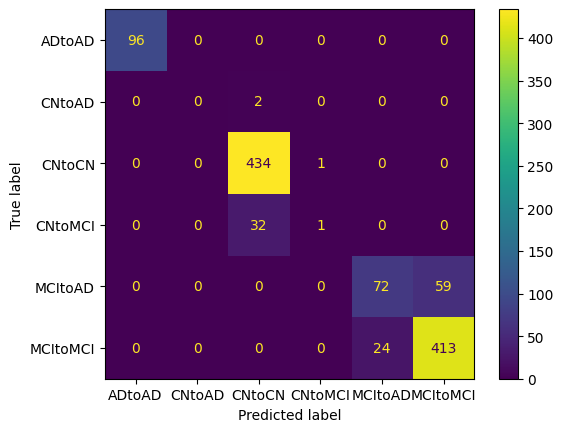

In [12]:
cm = confusion_matrix(y_test, y_pred_rfc, labels = model_RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_RFC.classes_)
disp.plot()

# **%%%%%%%%%%%%%%%XGBOOST MODEL%%%%%%%%%%%%%%%%%**

In [13]:
list_labels = list(labels.Transition)
label_converter = {
    "ADtoAD": 0,
    "CNtoCN": 1,
    "CNtoMCI": 2,
    "MCItoAD": 3,
    "MCItoMCI": 4,
    "CNtoAD": 5

}


def convert_labels(labels):
    converted_labels = [label_converter[label] for label in labels]
    return converted_labels


In [15]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
y_train_list = list(y_train.Transition)
y_test_list = list(y_test.Transition)

# Convert the training and testing sets into DMatrix format (specific to XGBoost)
y_train1 = convert_labels(y_train_list)
y_test1 = convert_labels(y_test_list)
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train1)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test1)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for multi-class classification
    'num_class': len(label_converter),  # number of classes
    'eval_metric': 'merror',  # evaluation metric
    'eta': 0.1,  # learning rate
    'max_depth': 3  # maximum depth of each tree
}

# Train the XGBoost model
num_rounds = 100  # number of boosting rounds
model_XGB = xgb.train(params, train_dmatrix, num_rounds)

# Make predictions on the testing set
y_pred_xgb = model_XGB.predict(test_dmatrix)

# Evaluate the model
print("Model accuracy: " + str(accuracy_score(y_test1,y_pred_xgb)))
print(classification_report(y_test1,y_pred_xgb))
print(label_converter)
accuracies.append(round(100*accuracy_score(y_test1,y_pred_xgb),3))
models.append('XGB')

Model accuracy: 0.8880070546737213
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.93      1.00      0.96       435
           2       0.60      0.09      0.16        33
           3       0.68      0.54      0.60       131
           4       0.87      0.92      0.90       437
           5       0.00      0.00      0.00         2

    accuracy                           0.89      1134
   macro avg       0.68      0.59      0.60      1134
weighted avg       0.87      0.89      0.87      1134

{'ADtoAD': 0, 'CNtoCN': 1, 'CNtoMCI': 2, 'MCItoAD': 3, 'MCItoMCI': 4, 'CNtoAD': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'ADtoAD': 0, 'CNtoCN': 1, 'CNtoMCI': 2, 'MCItoAD': 3, 'MCItoMCI': 4, 'CNtoAD': 5}


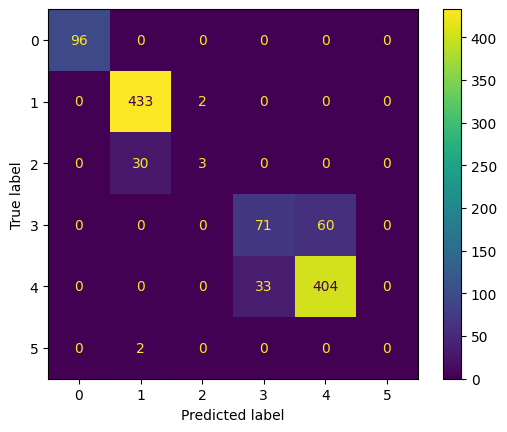

In [16]:
print(label_converter)
cm = confusion_matrix(y_test1, y_pred_xgb, labels = list(label_converter.values()))
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = list(label_converter.values()))
disp.plot()

# **%%%%%%%%%%%%%SUMMERIZE%%%%%%%%%%%%%%%**

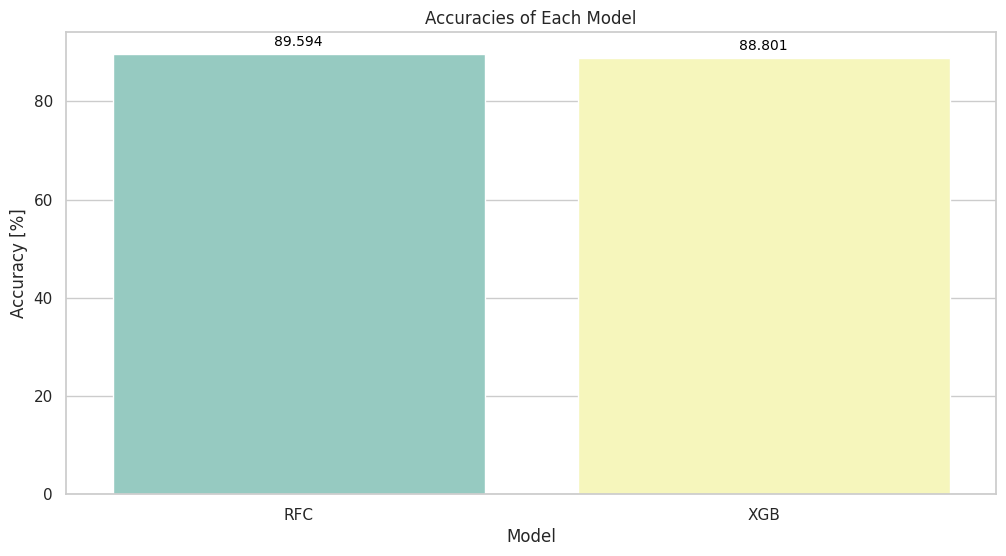

In [18]:
# Create a bar plot
plt.figure(figsize = (12,6))
sns.set(style="whitegrid")  # Optional: Set a seaborn style
ax = sns.barplot(x=models, y=accuracies, palette = "Set3")


# Add labels and a title
plt.xlabel("Model")
plt.ylabel("Accuracy [%]")
plt.title("Accuracies of Each Model")

# Display the values in the center of each bar
for i, v in enumerate(accuracies):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()